In [7]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

x = torch.linspace(0, 10, M)
data = -2 + x + torch.randn(M).to(dev)

w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-6, 2, N, requires_grad=False).to(dev)

def regression_model(a,x):
    return a+x

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -m[0].weights[index].log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])


Epoch: 0          Loss: 2829.8926  LR: 0.00100
Epoch: 100        Loss: 2579.0164  LR: 0.00100
Epoch: 200        Loss: 2397.1584  LR: 0.00100
Epoch: 300        Loss: 2252.7012  LR: 0.00100
Epoch: 400        Loss: 2146.3960  LR: 0.00100
Epoch: 500        Loss: 2095.5557  LR: 0.00100
Epoch: 521        Lr was reduced to: 0.00070
Epoch: 542        Lr was reduced to: 0.00049
Epoch: 543        Lr was reduced to: 0.00034
Epoch: 589        Lr was reduced to: 0.00024
Epoch: 590        Lr was reduced to: 0.00017
Epoch: 600        Loss: 2088.3225  LR: 0.00017
Epoch: 700        Loss: 2087.2810  LR: 0.00017
Epoch: 702        Lr was reduced to: 0.00012
Epoch: 800        Loss: 2087.0571  LR: 0.00012
Epoch: 805        Lr was reduced to: 0.00008
Epoch: 807        Lr was reduced to: 0.00006
Epoch: 808        Lr was reduced to: 0.00004
Epoch: 809        Lr was reduced to: 0.00003
Epoch: 812        Loss did not decrease
Epoch: 814        Lr was reduced to: 0.00002
Epoch: 815        Lr was reduced to: 0.000

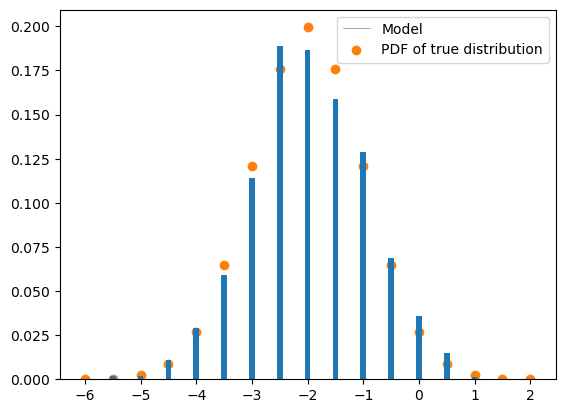

In [8]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-3)
opt.minimize(NLLLoss, verbose=True, print_freq=100, max_epochs=3000, tol_const=1e-2)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize

measure.visualize()
plt.scatter(xs, y, zorder=0)
plt.legend(['Model','PDF of true distribution'])
plt.show()
